In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#plt.style.use('seaborn')
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

In [3]:
def plot_radar(r, ax=None, fill=True, figsize=(6,6), **kwargs):
    """plot a radar 
    Inputs: r, list like"""
    
    if ax==None:
        fig, ax = plt.subplots(1,1,figsize=figsize, subplot_kw={'projection': 'polar'} )
    
    r = list(r)
    N = len(r)
    r.append( r[0] )  # repeat first to close circle

    # get angle for each value
    theta = [n * 2 * np.pi / N  for n in range(N) ]
    theta.append( theta[0] )
    
    ax.plot(theta, r, **kwargs)
    if fill:
        ax.fill(theta, r, alpha=0.1)
    ax.set_xticks(theta[:-1], );
    #ax.set_xticklabels( ['v1', 'v2'] );
    ax.spines['polar'].set_visible(False)  # 不显示极坐标最外圈的圆
    return ax
    


In [4]:
def show_opsims(dbDir):
    '''Show available opsim databases in the provided directory.

    Args:
        dbDir(str): The path the database directory.
    '''

    dbDir = os.path.abspath(dbDir)
    db_list = glob.glob(dbDir+'/*.db')
    runNames = [os.path.splitext(os.path.basename(x))[0] for x in db_list]

    return runNames


In [5]:
def scale(arr, mode=0):
    """scale array by max or 0-1"""
    newarr = arr / arr.max()
    if mode==1:
        newarr = (arr - arr.min()) / (arr.max()-arr.min())
    return newarr

def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]



In [6]:
# name of opsims
dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases


# v1.5  86
# v1.6  30 
# v1.7 74

runNames = show_opsims(dbpath)

runNames.sort()

In [194]:
# prepare proper motion dataframe from scores

#df_score_CI = pd.read_csv('./data/Score_CI.csv', skiprows=1, names=['score_CI'])
#df_score_LS = pd.read_csv('./data/Score_LS.csv', skiprows=1, names=['score_LS'])
#df_score_PMT = pd.read_csv('./data/Score_PMT.csv', skiprows=1, names=['score_PMT'])

#df_score_CI = pd.read_csv('./data/Score_CI.csv', index_col=0)
#df_score_LS = pd.read_csv('./data/Score_LS.csv', index_col=0)
#df_score_PMT = pd.read_csv('./data/Score_PMT.csv', index_col=0)

#df_properMotion = pd.DataFrame()

#df_properMotion['db'] = runNames
#df_properMotion['db'] = df_score_CI.db
#df_properMotion['FoM_CI'] = df_score_CI.fom
#df_properMotion['FoM_LS'] = df_score_LS.fom
#df_properMotion['FoM_PMT'] = df_score_PMT.fom

#df_properMotion.sort_values(by='db', inplace=True)
#df_properMotion.to_csv('./data/df_properMotion.csv', index=False)

In [7]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
cols_all = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy', 'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy']

cols_same = [ 'uu',  'gg',  'rr',  'ii',  'zz',  'yy']

cols_diff = ['ug', 'ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy']

cols_pm = ['FoM_CI', 'FoM_LS', 'FoM_PMT']

In [8]:
#df_tgaps_wfd = pd.read_csv('./data/df_tgapsFoM_WFD_v1.5.csv')
#df_nfields_wfd = pd.read_csv('./data/df_Nfields_WFD_v1.5.csv')
#df_nstars_wfd = pd.read_csv('./data/df_Nstars_WFD_v1.5.csv')
#
#df_tgaps_all = pd.read_csv('./data/df_tgapsFoM_allsky_v1.5.csv')
#df_nfields_all = pd.read_csv('./data/df_Nfields_allsky_v1.5.csv')
#df_nstars_all = pd.read_csv('./data/df_Nstars_allsky_v1.5.csv')

#-- GP --
df_tgaps_wfd = pd.read_csv('./data/df_tgapsFoM_GP_inwfd.csv')
df_nfields_wfd = pd.read_csv('./data/df_Nfields_GP_inwfd.csv')
df_nstars_wfd = pd.read_csv('./data/df_Nstar_GP_inwfd.csv')

df_tgaps_all = pd.read_csv('./data/df_tgapsFoM_GP.csv')
df_nfields_all = pd.read_csv('./data/df_Nfields_GP.csv')
df_nstars_all = pd.read_csv('./data/df_Nstar_GP.csv')
# -- GP -- 
 
    
#df_depth = pd.read_csv('./data/depthFoM_v1.5.csv')
#df_depth = df_depth[ df_depth['db']!='baseline_samefilt_v1.5_10yrs.db'].copy()  # remove the missed one 
#df_depth.reset_index(drop=True, inplace=True)

#df_properMotion = pd.read_csv('./data/df_properMotion.csv')


In [9]:
# normalize
for df in [df_tgaps_wfd, df_nfields_wfd, df_nstars_wfd, 
           df_tgaps_all, df_nfields_all, df_nstars_all]:
    
    
    for col in cols_all:
        # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
        df[col] = scale(df[col])
    
    df['total'] = scale( np.sum(df[ cols_all ], axis=1) )


#for col in filters:
#    df_depth[col] = scale(df_depth[col], mode=1)

#for col in ['FoM_CI', 'FoM_LS', 'FoM_PMT']:
#    df_properMotion[col] = scale(df_properMotion[col], mode=1)


#df_tgaps['total'] = scale( np.sum(df_tgaps[ cols_all ], axis=1) )
#df_nfields['total'] = scale( np.sum(df_nfields[ cols_all ], axis=1) )
#df_nstar['total'] = scale( np.sum(df_nstar[ cols_all ], axis=1) )
#df_depth['total'] = scale( np.sum(df_depth[ filters ], axis=1) )

#df_properMotion['total'] = scale( np.sum(df_properMotion[ cols_pm ], axis=1) )



In [18]:
runNames

['agnddf_v1.5_10yrs',
 'alt_dust_v1.5_10yrs',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs',
 'baseline_2snaps_v1.5_10yrs',
 'baseline_samefilt_v1.5_10yrs',
 'baseline_v1.5_10yrs',
 'bulges_bs_v1.5_10yrs',
 'bulges_bulge_wfd_v1.5_10yrs',
 'bulges_cadence_bs_v1.5_10yrs',
 'bulges_cadence_bulge_wfd_v1.5_10yrs',
 'bulges_cadence_i_heavy_v1.5_10yrs',
 'bulges_i_heavy_v1.5_10yrs',
 'daily_ddf_v1.5_10yrs',
 'dcr_nham1_ug_v1.5_10yrs',
 'dcr_nham1_ugr_v1.5_10yrs',
 'dcr_nham1_ugri_v1.5_10yrs',
 'dcr_nham2_ug_v1.5_10yrs',
 'dcr_nham2_ugr_v1.5_10yrs',
 'dcr_nham2_ugri_v1.5_10yrs',
 'descddf_v1.5_10yrs',
 'filterdist_indx1_v1.5_10yrs',
 'filterdist_indx2_v1.5_10yrs',
 'filterdist_indx3_v1.5_10yrs',
 'filterdist_indx4_v1.5_10yrs',
 'filterdist_indx5_v1.5_10yrs',
 'filterdist_indx6_v1.5_10yrs',
 'filterdist_indx7_v1.5_10yrs',
 'filterdist_indx8_v1.5_10yrs',
 'footprint_add_mag_cloudsv1.5_10yrs',
 'footprint_big_sky_dustv1.5_10yrs',
 'footprint_big_sky_nouiyv1.5_10yrs',
 'footprint_big_skyv1.5_10yrs',
 

In [10]:
df_radar = pd.DataFrame()

df_radar['db'] = runNames

df_radar['tgaps_wfd'] = df_tgaps_wfd['total'] 
df_radar['tgaps_all'] = df_tgaps_all['total'] 

df_radar['nfields_wfd'] = df_nfields_wfd['total'] 
df_radar['nfields_all'] = df_nfields_all['total'] 

df_radar['nstars_wfd'] = df_nstars_wfd['total'] 
df_radar['nstars_all'] = df_nstars_all['total'] 



df_radar.to_csv('./data/df_radar.csv', index=False)

In [65]:
#df_radar = pd.read_csv('./data/df_radar.csv')

In [23]:
df_radar.head()

,db,tgaps_wfd,tgaps_all,nfields_wfd,nfields_all,nstars_wfd,nstars_all
0,agnddf_v1.5_10yrs,0.443376,0.206774,0.564762,0.685304,0.610002,0.260824
1,alt_dust_v1.5_10yrs,0.603965,0.645587,0.554701,0.668529,0.307607,0.177407
2,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs,0.679559,0.637691,0.644424,0.733377,0.371077,0.192736
3,baseline_2snaps_v1.5_10yrs,0.409759,0.565965,0.330473,0.460350,0.396784,0.209893
4,baseline_samefilt_v1.5_10yrs,0.212943,0.469517,0.357034,0.386768,0.356612,0.143061


In [11]:
def get_rank(x):
    """get the ranking of each item in array"""
    seq = sorted(x)
    index = [seq.index(v) for v in x]
    return index



In [12]:
df_rank = pd.DataFrame()

df_rank['db'] = runNames

df_rank['tgaps_wfd'] = get_rank(  df_tgaps_wfd['total'] )
df_rank['tgaps_all'] = get_rank( df_tgaps_all['total'] )

df_rank['nfields_wfd'] = get_rank( df_nfields_wfd['total'] )
df_rank['nfields_all'] = get_rank( df_nfields_all['total'] )

df_rank['nstars_wfd'] = get_rank( df_nstars_wfd['total'] )
df_rank['nstars_all'] = get_rank( df_nstars_all['total'] )



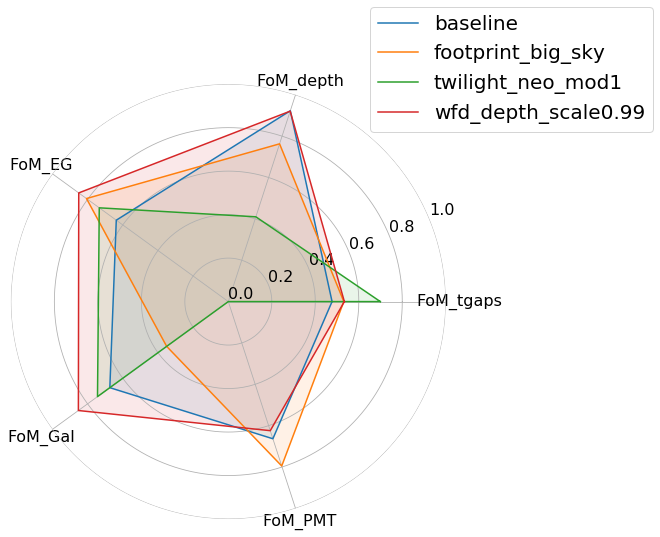

In [211]:
dbnames = [ 'baseline_v1.5_10yrs', 'footprint_big_skyv1.5_10yrs',
           'twilight_neo_mod1_v1.5_10yrs',
           'wfd_depth_scale0.99_v1.5_10yrs']

FoMvars = ['FoM_tgaps', 'FoM_depth', 'FoM_EG', 'FoM_Gal', 'FoM_PMT']


fig, ax = plt.subplots(1,1,figsize=(8,8), subplot_kw={'projection': 'polar'} )

for dbname in dbnames:
    r = df_radar[ df_radar.db==dbname ][FoMvars].values.flatten()
    
    label = dbname.replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "")
    ax = plot_radar(r=r, label=label, fill=True, ax=ax)

ax.set_xticklabels(FoMvars, );
ax.set_yticks([0, .2, .4, .6, .8, 1])
#ax.set_rlabel_position(0)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.2))

plt.savefig("figures/radar.pdf", bbox_inches='tight')

### parallel coord plot

In [13]:
family2color = {'agnddf': '#a6cee3',
 'alt': '#1f78b4',
 'baseline': '#b2df8a',
 'bulges': '#33a02c',
 'daily': '#fb9a99',
 'dcr': '#e31a1c',
 'descddf': '#fdbf6f',
 'filterdist': '#ff7f00',
 'footprint': '#cab2d6',
 'goodseeing': '#6a3d9a',
 'greedy': '#ffff99',
 'roll': '#b15928',
 'rolling': '#004301',
 'short': '#5e0022',
 'spiders': '#ed00d7',
 'third': '#00008f',
 'twilight': '#626d60',
 'u60': '#9978ff',
 'var': '#5b3600',
 'wfd': '#00a799'}


In [14]:
def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]

In [15]:
df_rank['family'] = df_rank.apply(get_family, axis=1)



In [129]:
df_rank.family.unique()

array(['agnddf', 'alt', 'baseline', 'bulges', 'daily', 'dcr', 'descddf',
       'filterdist', 'footprint', 'goodseeing', 'greedy', 'roll',
       'rolling', 'short', 'spiders', 'third', 'twilight', 'u60', 'var',
       'wfd'], dtype=object)

In [130]:
colorlist = [ family2color[i] for i in df_rank.family.values ]

In [111]:
df_rank['db'].str.contains('twi')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64     True
65     True
66     True
67     True
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
Name: db, Length: 86, dtype: bool

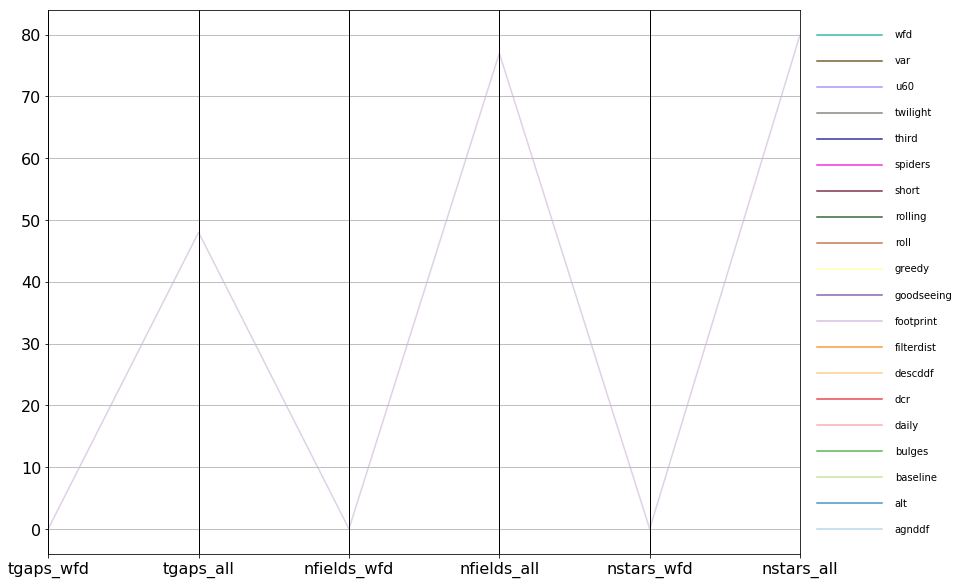

In [16]:
fig = plt.figure(figsize=(15,10))
#pl.rcParams["font.size"] = 20
gs = fig.add_gridspec(1, 10)
ax = fig.add_subplot(gs[0, :9])
foms = ['tgaps_wfd', 'tgaps_all' ,'nfields_wfd', 'nfields_all', 'nstars_wfd', 'nstars_all']

idx = df_rank['db'].str.contains('newA')

df_p = df_rank[ idx ]
colorlist = [ family2color[i] for i in df_p.family.values ]
ax = pd.plotting.parallel_coordinates(
    df_p, "db", foms, color=colorlist, alpha=0.6)

plt.xticks([0,1,2,3,4, 5], labels=foms,)
#           fontsize=20)
# legend
ax.legend().remove()
ax = fig.add_subplot(gs[0, 9:])
for i,c in enumerate(family2color):
    ax.plot([0, 1], [i,i], color=family2color[c], alpha=0.8)
    ax.text(1.2, i, c, ha="left", va='center')
    ax.axis('off')
    
#plt.savefig('figures/opsimParallelCoord.pdf')


In [132]:
df_rank[ idx ]

,db,tgaps_wfd,tgaps_all,nfields_wfd,nfields_all,nstars_wfd,nstars_all,family
34,footprint_gp_smoothv1.5_10yrs,29,83,22,85,22,85,footprint
37,footprint_no_gp_northv1.5_10yrs,34,15,28,14,26,12,footprint
